# Predicting Housing Prices

**Trey S. Clark**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

In 2019, Yahoo ran an article called "[Meet the A.I. Landlord That’s Building a Single-Family-Home Empire](https://www.yahoo.com/now/meet-landlord-building-single-family-103058132.html)." It is clear from the headline that companies are investing heavily in predictive housing models. Whether it is [Zillow's iBuyer](https://www.vox.com/22743258/home-buying-zillow-redfin-ibuyers-real-estate) program buying and selling houses or private-equity firms like [Blackstone Group](https://www.reuters.com/business/blackstone-buy-home-partners-america-6-billion-deal-wsj-2021-06-22/) entering the single-family rental market, the need for predictive housing models has never been greater. 

With such large players entering the market, it is worth asking: "Is predictive modeling only available to deep-pocketed Wall Street firms?" Or, is it possible for small players in the real estate industry to develop accurate housing models? The following report shows how this is indeed possible. 

[Back to top](#Index)


## 1. Introduction

The world is awash in data and free tools to process it. It is now easier than ever to build accurate models from datasets. The following report explores if housing prices can be predicted with at least 90% accuracy using publicly available datasets and software tools.

The first step in accomplishing this was to explore and clean the data. Pandas was used to load the data into memory from CSV files. Two subsets of data were used to train and validate the data.

During the data exploration, the data_description.txt file helped provide context about the 82 fields in the dataset. Through this exploration, it was discovered that 16 fields had categorical data that was ordinal. The ordinal data was not included in the model. However, it could be added using one-hot-encoding. 

The data was cleaned by selecting the numeric data and using linear interpolation to fill in missing values. In addition, columns that only had zero values were removed. 

Then correlations between the remaining data and the sales price were identified. The fields were grouped by their correlation strength. Twenty-nine variables had at least a moderate correlation, defined as a correlation coefficient greater than 0.39. 

At this point, the data was split into three different groups. Group 1 was not restricted by the correlation coefficient. Group 2 contained a correlation coefficient greater than 0.19. Group 3 contained correlation coefficients greater than 0.39.

Afterward, a linear regression model was created for the three groups of variables. The Coefficient of Determination was used to determine whether the linear regression algorithm was a good fit for the models. Then the models were validated against the test data.

[Back to top](#Index)

## 2. The Data



[Back to top](#Index)

### 2.1 Import the Data

##### Data:

- **Training Dataset:** ./source/housesmalldata/houseSmallData.csv 
    - The dataset is a detailed list about the property details (82 columns) of 100 houses sold in particular neighborhoods.


- **Data Descriptions:** ./source/data-description/data_description.txt
    - This text file provides descriptions of each field used in the dataset. It also explains the meaning of any codes used in the dataset.
    
#### Steps:

1. **Import:** Numpy, Pandas, Matplotlib, Seaborn, Sklearn, and SciPy are imported to manipulate and visualize the data.

2. **Read:** The training and test data are loaded into memory from csv files either through Kaggle or from this Github's repository.

3. **Helper Functions:** Helper functions are created to track the change in columns as the data is cleaned.

In [49]:
# Data Import: Step 1 (Import)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model


In [50]:
# Data Import: Step 2 (Read)


# Toggle whether accessing it from Kaggle or local computer
isKaggleAccess = False

if isKaggleAccess:
    # Get training data from Kaggle
    train_data = pd.read_csv('../input/housesmalldata/houseSmallData.csv')

    # Get testing data from Kaggle 
    test_data = pd.read_csv('../input/jtest/jtest.csv')
else: 
    # Get training data from computer
    train_data = pd.read_csv('./source/houseSmallData.csv')

    # Get testing data from computer 
    test_data = pd.read_csv('./source/jtest.csv')


In [51]:
# Data Import: Step 3 (Helper Functions)


# Track columns being used
train_col_count = None
test_col_count = None

# Track if the number of training columns in use has changed
def trackTrainColCount(data_to_count):
    global train_col_count
    # First time columns are being counted
    if train_col_count == None:
        print(f'There are {len(data_to_count.columns)} columns in use.')
    # Column number did not change
    elif len(data_to_count.columns) == train_col_count:
        print(f'There is still {train_col_count} columns in use.')
    # Column number changed
    else: 
        print(f'There are now {len(data_to_count.columns)} columns in use.')
    # Update column counter
    train_col_count = len(data_to_count.columns)
    

# Track if the number of testing columns in use has changed
def trackTestColCount(data_to_count):
    global test_col_count
    # First time columns are being counted
    if test_col_count == None:
        print(f'There are {len(data_to_count.columns)} columns in use.')
    # Column number did not change
    elif len(data_to_count.columns) == test_col_count:
        print(f'There is still {test_col_count} columns in use.')
    # Column number changed
    else: 
        print(f'There are now {len(data_to_count.columns)} columns in use.')
    # Update column counter
    test_col_count = len(data_to_count.columns)

[Back to top](#Index)

### 2.2 Data Exploration

##### Steps:

1. **Show Column & Row Count:** Show the initial number of columns & rows before data cleaning.

2. **Show Head:** Display the first 5 rows of the training data.

3. **Show NAN Percentage:** Show the percent of missing values in each column of the training data.
     - Based on research, there is no number cut off threshold for nans, but is instead handled on a case by case basis.
     - Columns with high nans will not be removed now, but will be monitored if they pass through the data cleansing phase.
        
        
4. **Toggle Ordinal Data Inclusion:** Set whether the dataset will include ordinal data.

5. **Identify Ordinal Data in Training Data:** Columns with categorical data that is ordinal are split into separate numerical columns using one-hot-encoding and included in the training and test datasets.
    - **Show Column Count:** Columns are counted again to show the effects of the conversion.
    - **Show Head:** The first 5 rows of the training data are displayed to show the inclusion of the ordinal data.


6. **Identify Ordinal Data in Testing Data:** Columns with categorical data that is ordinal are split into separate numerical columns using one-hot-encoding and included in the training and test datasets.
    - **Show Column Count:** Columns are counted again to show the effects of the conversion.
    - **Show Head:** The first 5 rows of the testing data are displayed to show the inclusion of the ordinal data.
    
    
7. **'SalePrice' Distribution:** Sales price had less of a skew with a log normal distribution.

8. **Test Assumed Relationships:** Show graphs for relationships between columns that are assumed to affect the sales price.
    - Seaborn Swarmplots were used to add jitter and prevent overlapping values.
    - Year built, full bath, and bedrooms (above grade) have a positive correlation with the sale price.

In [52]:
# Data Exploration: Step 1 (Show Column & Row Count)


# Show number of rows [properties] and columns [property attributes]
trackTrainColCount(train_data)
print(f'Also, there are {train_data.shape[0]} rows.')

There are 82 columns in use.
Also, there are 100 rows.


In [53]:
# Data Exploration: Step 2 (Show Head)


# Show first 5 records
train_data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
# Data Exploration: Step 3 (Show NAN Percentage)


# Determine the percentage of nans in the columns
nan_percentages = train_data.isna().mean().sort_values(ascending=False).round(4) * 100

print(f'Percentage of Missing Values\n\n{nan_percentages}')

Percentage of Missing Values

PoolQC         100.0
Alley           94.0
MiscFeature     91.0
Fence           77.0
FireplaceQu     54.0
               ...  
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofMatl         0.0
SalePrice        0.0
Length: 82, dtype: float64


In [55]:
# Data Exploration: Step 4 (Toggle Ordinal Data)


# Toggle whether to include categorical data that is ordinal
hasOrdinalData = False

In [56]:
# Data Exploration: Step 5 (Identify Ordinal Data in Training Data)


# Evaluate using categorical data

if hasOrdinalData: 
    # Categorical data considered ordinal
    ordinals = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2', 
                'HeatingQC', 'KitchenQual','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

    # Create dummies for ordinal data and add them to the dataset
    train_data = pd.get_dummies(train_data, columns = ordinals)

# Track columns being used
trackTrainColCount(train_data)

train_data.head()

There is still 82 columns in use.


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
# Data Exploration: Step 6 (Identify Ordinal Data in Testing Data)


if hasOrdinalData:
    # Create dummies for ordinal data and add them to the testing dataset
    test_data = pd.get_dummies(test_data, columns = ordinals)

# Track columns being used
trackTestColCount(test_data)

test_data.head()

There are 82 columns in use.


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


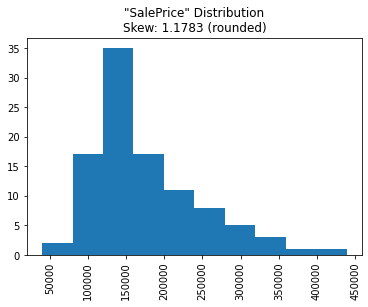

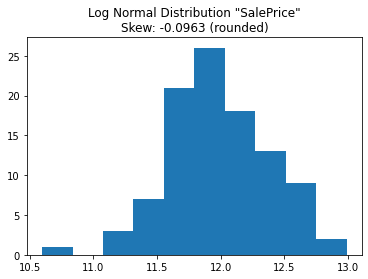

In [58]:
# Data Exploration: Step 7 ('SalePrice' Distribution)


# Identify the distribution of the 'SalePrice'
sale_price = train_data['SalePrice']
plt.hist(sale_price)
plt.title(f'"SalePrice" Distribution\nSkew: {sale_price.skew().round(4)} (rounded)')
plt.xticks(rotation=90)
plt.show()

print('\n')

log_sale_price = np.log(sale_price)
plt.hist(log_sale_price)
plt.title(f'Log Normal Distribution "SalePrice"\nSkew: {log_sale_price.skew().round(4)} (rounded)')
plt.show()

# The distribution of the "SalePrice" more closely resembles a log normal distribution
target = log_sale_price

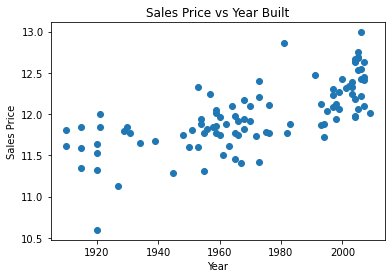

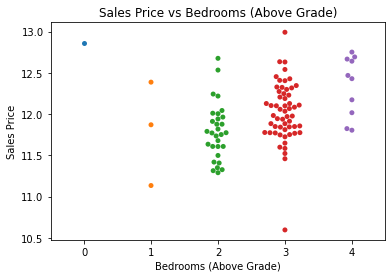

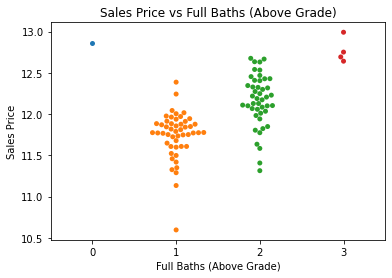

In [59]:
# Data Exploration: Step 8 (Test Assumed Relationships)


# YearBuilt
plt.scatter(train_data['YearBuilt'], y=target)
plt.title('Sales Price vs Year Built')
plt.xlabel('Year')
plt.ylabel('Sales Price')
plt.show()

print('\n\n')

# Note: Used swarmplots below to add jitter and prevent overlapping values

# BedroomAbvGr 
sns.swarmplot(x=train_data['BedroomAbvGr'], y=target)
plt.title('Sales Price vs Bedrooms (Above Grade)')
plt.xlabel('Bedrooms (Above Grade)')
plt.ylabel('Sales Price')
plt.show()

print('\n\n')

# FullBath
sns.swarmplot(x=train_data['FullBath'], y=target)
plt.title('Sales Price vs Full Baths (Above Grade)')
plt.xlabel('Full Baths (Above Grade)')
plt.ylabel('Sales Price')
plt.show()


[Back to top](#Index)

### 2.3 Data Preparation

##### Steps:

1. **Select Only Relevant Columns:** Columns such as "Id" and "Unnamed: 0" should be removed from the dataset.
    - **Show Column Count:** Columns are counted again to show the effects of the conversion.


2. **Select Only Numeric Columns:** If a column is still non-numeric, it needs to be removed. All categorical data that is ordinal was already converted to a numeric format in the data preparation.
    - **Show Column Count:** Columns are counted again to show the effects of the conversion.


3. **Show Column Names With Nulls:** Identify which numeric columns have missing values.


4. **Interpolate Training Data:** Try to use linear interpolation on training columns with missing values and if not drop the columns.
    - **Show Column Count:** Columns are counted again to show the effects of the conversion.
    
    
5. **Select Only Non-Zero Sum Training Columns:** Remove all training columns whose sum equals to zero.
    - **Show Column Count:** Columns are counted again to show the effects of the conversion.


6. **Interpolate Testing Data:** Try to use linear interpolation on testing columns with missing values and if not drop the columns.
    - **Show Column Count:** Columns are counted again to show the effects of the conversion.


7. **Select Only Non-Zero Sum Testing Columns:** Remove all testing columns whose sum equals to zero.
    - **Show Column Count:** Columns are counted again to show the effects of the conversion.


8. **Show Column Difference:** Show the shape of the training and testing datasets and list column names that are not included in the both.


9. **Show Align Result:** Align the training and testing datasets so that they have the same columns and then show their new shape.
    


In [60]:
# Data Preparation: Step 1 (Select Only Relevant Columns)


# Remove non-relevant data such as id and unnamed columns
relev_data = train_data[train_data.columns[~train_data.columns.isin(['Unnamed: 0','Id'])]]

# Track columns being used
trackTrainColCount(relev_data)

There are now 80 columns in use.


In [61]:
# Data Preparation: Step 2 (Select Only Numeric Columns)


# Remove non-numeric data
num_data = relev_data.select_dtypes(include=[np.number])

# Track columns being used
trackTrainColCount(num_data)

There are now 38 columns in use.


In [62]:
# Data Preparation: Step 3 (Show Column Names With Nulls)


# Check for null values in the remaining (numeric) fields
count_nulls = pd.DataFrame(num_data.isnull().sum().sort_values(ascending= False))

# Store only columns with null values
nulls = count_nulls[count_nulls.iloc[:,0]>0]

# Store column names of nulls
null_cols = nulls.index

print(f'The following numeric columns have null values: {list(null_cols)}')

The following numeric columns have null values: ['PoolQC', 'LotFrontage', 'GarageYrBlt']


In [63]:
# Data Preparation: Step 4 (Interpolate Training Data)


# Interpolate data
num_data = num_data.select_dtypes(include=np.number).interpolate().dropna(axis = 1)


# Verify no nulls are remaining
print(f'There are now {sum(num_data.isnull().sum() != 0)} numeric columns with null values.')

# Track columns being used
trackTrainColCount(num_data)

There are now 0 numeric columns with null values.
There are now 37 columns in use.


In [64]:
# Data Preparation: Step 5 (Select Only Non-Zero Sum Training Columns)


# Remove columns that only have zero as a value
clean_data = num_data[num_data.columns[num_data.sum() > 0]]


# Track columns being used
trackTrainColCount(clean_data)

There are now 36 columns in use.


In [65]:
# Data Preparation: Step 6 (Interpolate Testing Data)


# Interpolate test data
num_test_data = test_data.select_dtypes(include=np.number).interpolate().dropna(axis = 1)


# Verify no nulls are remaining
print(f'There are now {sum(num_test_data.isnull().sum() != 0)} numeric columns with null values.')

# Track columns being used
trackTestColCount(num_test_data)

There are now 0 numeric columns with null values.
There are now 38 columns in use.


In [66]:
# Data Preparation: Step 7 (Select Only Non-Zero Sum Testing Columns)


# Remove columns test data that only have zero as a value
clean_test_data = num_test_data[num_test_data.columns[num_test_data.sum() > 0]]


# Track columns being used
trackTestColCount(clean_test_data)

There is still 38 columns in use.


In [67]:
# Data Preparation: Step 8 (Show Column Difference)

print(f'Shape of "train_data" {clean_data.shape} and "test_data" {clean_test_data.shape} before alignment. \n')

# Determine which columns are not in both the testing and training datasets
diff_cols = clean_data.columns.symmetric_difference(clean_test_data.columns)

print(f'Columns that are not in both dataframes: {diff_cols.tolist()}' )

Shape of "train_data" (100, 36) and "test_data" (100, 38) before alignment. 

Columns that are not in both dataframes: ['Id', 'LotFrontage', 'PoolArea', 'Unnamed: 0']


In [68]:
# Data Preparation: Step 9 (Show Align Result)


# Align training and testing data
clean_data, clean_test_data = clean_data.align(clean_test_data, join='inner', axis=1)

print(f'Shape of "train_data" {clean_data.shape} and "test_data" {clean_test_data.shape} after alignment.')


Shape of "train_data" (100, 35) and "test_data" (100, 35) after alignment.


[Back to top](#Index)

### 2.4 Correlation

##### Steps:

1. **Identify Correlation:** Determine the correlation of the data to the sales price.
    - **Sort & Exclude Sales Price:** Sort the correlated values in descending order and exclude the sales price.
    - **Group & Show Correlations:** Group correlations by their strengths.
    - **Show Abbr. List of Correlations:** Show a sorted and abbreviated list of correlations.
    
    
2. **Limit Columns by Correlation Strength:** Limit model to columns that surpass the mininmum and maximum thresholds.
    - **Show Column Count:** Columns are counted again to show the effects of the limit.
    
    
3. **Store Remaining Column Names:** Store the names of the remaining columns that were restricted by their correlation strength.


4. **Assign Model's X and Y Values:** Assign the sales price data to the y values of the model and the remaining columns to the x values.
    - **Show Head:** Show the first five rows of the final x values.

In [69]:
# Correlation: Step 1 (Identify Correlation)


# Determine correlation of numeric columns to the 'SalePrice' column
all_corr = clean_data.corr()['SalePrice']

# Sort then store the correlated columns not including the 'SalePrice'
sorted_corr = all_corr.sort_values(ascending = False)[1:]

# Group the correlated columns by strength
bins = [-1, -0.59, -0.39, -0.19, 0.19, 0.39, 0.59, 1]
labels = ['Strong Negative Assoc.','Medium Negative Assoc.','Weak Negative Assoc.','No Assoc.','Weak Positive Assoc.','Medium Positive Assoc.','Strong Positive Assoc.']
grouped_corr = sorted_corr.groupby(pd.cut(sorted_corr, bins=bins, labels=labels)).size().reset_index(name='Count')

# Count columns not including the sales price
count_excl_sales = (len(sorted_corr)-1)
# Count columns that have a correlation with the sales price
count_has_corr = count_excl_sales - grouped_corr.iloc[3,1]

print (grouped_corr,"\n\n")

print('Appoximately {:.2%} of the columns have either a positive or negative correlation with the sales price. \n\n'.format((count_has_corr/count_excl_sales)))

print(f'Correlation of {count_excl_sales} numeric columns compared to the "SalePrice" \n\n')
                      
print(sorted_corr)

                SalePrice  Count
0  Strong Negative Assoc.      0
1  Medium Negative Assoc.      0
2    Weak Negative Assoc.      3
3               No Assoc.      9
4    Weak Positive Assoc.      7
5  Medium Positive Assoc.      9
6  Strong Positive Assoc.      6 


Appoximately 72.73% of the columns have either a positive or negative correlation with the sales price. 


Correlation of 33 numeric columns compared to the "SalePrice" 


OverallQual      0.855061
GrLivArea        0.735129
GarageArea       0.688249
GarageCars       0.663441
YearBuilt        0.658636
TotalBsmtSF      0.616297
GarageYrBlt      0.589361
FullBath         0.579505
MasVnrArea       0.571836
TotRmsAbvGrd     0.553603
1stFlrSF         0.550912
YearRemodAdd     0.548330
LotArea          0.497124
Fireplaces       0.487907
WoodDeckSF       0.451241
2ndFlrSF         0.381076
BsmtUnfSF        0.327020
HalfBath         0.319304
OpenPorchSF      0.301960
BsmtFinSF1       0.266713
MoSold           0.256863
BedroomAbvGr   

In [70]:
# Correlation: Step 2 (Limit Columns by Correlation Strength)


# Store the correlated columns after limiting them to correlations less than 'min_not_include' or greater than 'max_not_include'.

# No Correlation Limits
no_min_not_include = -0.0
no_max_not_include = 0.0

# Medium Correlation Limits
med_min_not_include = -0.19
med_max_not_include = 0.19

# High Correlation Limits
hi_min_not_include = -0.39
hi_max_not_include = 0.39

no_lim_corr = pd.DataFrame(sorted_corr[~sorted_corr.between(no_min_not_include, no_max_not_include)])
med_lim_corr = pd.DataFrame(sorted_corr[~sorted_corr.between(med_min_not_include, med_max_not_include)])
hi_lim_corr = pd.DataFrame(sorted_corr[~sorted_corr.between(hi_min_not_include, hi_max_not_include)])

# Assign to arrays
min_not_include_list = [no_min_not_include, med_min_not_include, hi_min_not_include]
max_not_include_list = [no_max_not_include, med_max_not_include, hi_max_not_include]
lim_corr_list = [no_lim_corr, med_lim_corr, hi_lim_corr]

print('Correlation (corr) compared to the "SalePrice":\n')

count = 1
for min_not_include, max_not_include, lim_corr in zip(min_not_include_list, max_not_include_list, lim_corr_list):
    print(f'\tGroup {count} |corr| > {max_not_include}: There are {len(lim_corr)} cleansed columns.\n')
    count += 1

Correlation (corr) compared to the "SalePrice":

	Group 1 |corr| > 0.0: There are 34 cleansed columns.

	Group 2 |corr| > 0.19: There are 25 cleansed columns.

	Group 3 |corr| > 0.39: There are 15 cleansed columns.



In [71]:
# Correlation: Step 3 (Store Remaing Column Names)


# Store the correlated columns names
no_lim_corr_cols = no_lim_corr.index
med_lim_corr_cols = med_lim_corr.index
hi_lim_corr_cols = hi_lim_corr.index

# Assign to array 
lim_corr_cols_list = [no_lim_corr_cols, med_lim_corr_cols, hi_lim_corr_cols]


In [72]:
# Correlation: Step 4 (Assign Model's X & Y Values)


# Get x and y values 

# Assign 'SalePrice' y column
y = clean_data['SalePrice']

# Assign all remaining columns except 'SalePrice' to x column
x_no_lim = clean_data[no_lim_corr_cols]
x_med_lim = clean_data[med_lim_corr_cols]
x_hi_lim = clean_data[hi_lim_corr_cols]

# Assign to array
x_train_list = [x_no_lim, x_med_lim, x_hi_lim]

# Cycle through all x lists
for max_not_include, x_train in zip(max_not_include_list, x_train_list):
    print(f'\n|corr| > {max_not_include}')
    # Show truncated data 
    display(x_train.head())



|corr| > 0.0


,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,...,3SsnPorch,BsmtHalfBath,MSSubClass,MiscVal,BsmtFinSF2,LowQualFinSF,OverallCond,EnclosedPorch,KitchenAbvGr,YrSold
0,7,1710,548,2,2003,856,2003.0,2,196.0,8,...,0,0,60,0,0,0,5,0,1,2008
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6,...,0,1,20,0,0,0,8,0,1,2007
2,7,1786,608,2,2001,920,2001.0,2,162.0,6,...,0,0,60,0,0,0,5,0,1,2008
3,7,1717,642,3,1915,756,1998.0,1,0.0,7,...,0,0,70,0,0,0,5,272,1,2006
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9,...,0,0,60,0,0,0,5,0,1,2008



|corr| > 0.19


,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,...,2ndFlrSF,BsmtUnfSF,HalfBath,OpenPorchSF,BsmtFinSF1,MoSold,BedroomAbvGr,EnclosedPorch,KitchenAbvGr,YrSold
0,7,1710,548,2,2003,856,2003.0,2,196.0,8,...,854,150,1,61,706,2,3,0,1,2008
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6,...,0,284,0,0,978,5,3,0,1,2007
2,7,1786,608,2,2001,920,2001.0,2,162.0,6,...,866,434,1,42,486,9,3,0,1,2008
3,7,1717,642,3,1915,756,1998.0,1,0.0,7,...,756,540,0,35,216,2,3,272,1,2006
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9,...,1053,490,1,84,655,12,4,0,1,2008



|corr| > 0.39


,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea,TotRmsAbvGrd,1stFlrSF,YearRemodAdd,LotArea,Fireplaces,WoodDeckSF
0,7,1710,548,2,2003,856,2003.0,2,196.0,8,856,2003,8450,0,0
1,6,1262,460,2,1976,1262,1976.0,2,0.0,6,1262,1976,9600,1,298
2,7,1786,608,2,2001,920,2001.0,2,162.0,6,920,2002,11250,1,0
3,7,1717,642,3,1915,756,1998.0,1,0.0,7,961,1970,9550,1,0
4,8,2198,836,3,2000,1145,2000.0,2,350.0,9,1145,2000,14260,1,192



[Back to top](#Index)

## 3. Project Description

The 'data_descriptions.txt' file provided insight into which columns should be included in the model. An additional 16 categorical columns were included by using the 'data_descriptions.txt' file to identify which categorical columns were ordinal. 

In addition, more columns were included by determining their correlation to the sales price. 55 columns were found to have at least some correlation to the sales price. Out of the 55 columns, 29 columns were found to have a moderate to strong correlation with the sales price. A medium to strong correlation coefficient is defined as greater than 0.39.

The variables were divided into three groups based on their correlation. Plotting the residuals and the predictions showed that the algorithm was a good fit for the models. Sales prices could be predicted with up to approximately 98% accuracy.

[Back to top](#Index)

### 3.1 Linear Regression

A linear regression algorithm was used to model the relationship between the explanatory variables and the dependent variable by fitting a linear equation to the observed data. The dependent variable in this model is the sales price, and the explanatory variables are the property attributes, such as the number of bedrooms, living area square footage, etc. 

However, it is important to first establish a relationship between the explanatory variables and the dependent variable. Section 2.4 above shows that there is indeed a correlation between the dependent variable and approximately 61 percent of the explanatory variables. 

The linear equation is in the form of Y=a+bX. The dependent variable, Y, is the sales price, and the explanatory variables, X, are the property attributes. The slope of the line, b, is calculated by the formula b = r (sy/sx). The correlation factor is represented by r. The standard deviations for x and y, are represented by sy and sx, respectively. The y-intercept, a, is the y value when x is equal to zero.[6]

It should be noted that correlation does not mean causation. Sometimes a third variable is responsible for the correlation between the dependent and explanatory variables.

Histograms of the residuals were plotted to verify the residuals were normally distributed. 

![normality-histogramy](/imgs/normality-histogram.png)

The Least-Squares Method was used to fit the regression line. It is the most common method for calculating the best-fitting line for the observed data. This is done by minimizing the sum of the squares of the vertical deviations. Since these deviations are only summed after they have been squared, all values are positive. This ensures that there are no cancellations between positive and negative values.[4] 

Once the Least Squares Regression Line is calculated the sales price can be determined by substituting the x values into the equation.[6] Care should be taken to avoid extrapolation. Sales price should only be estimated for values within the range of the model.[4] 
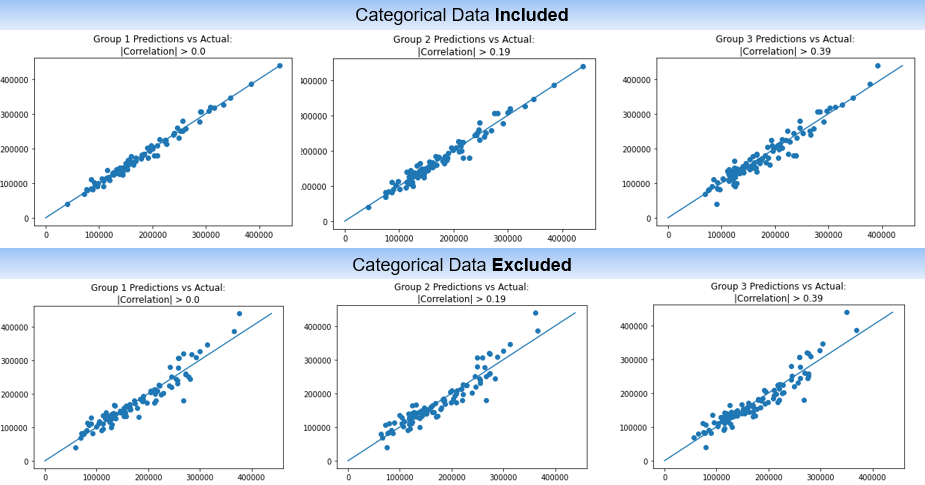
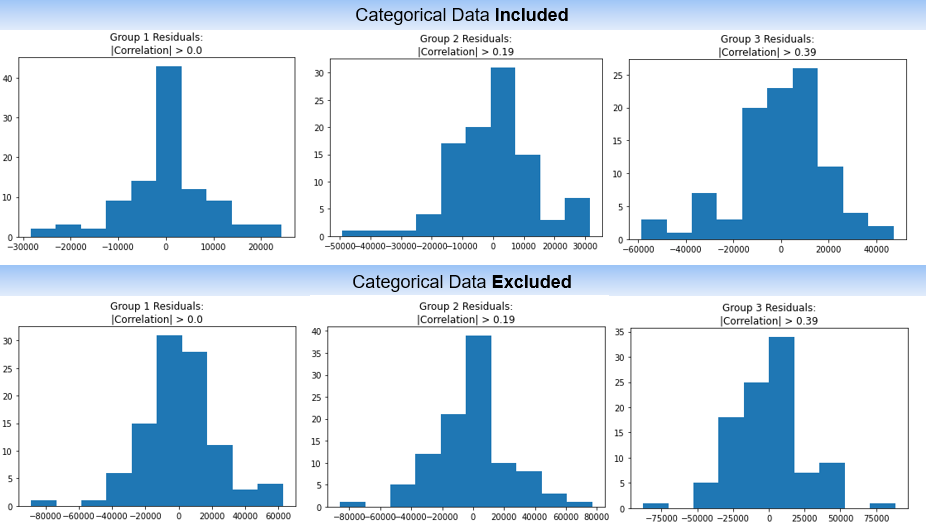

[Back to top](#Index)

### 3.2 Analysis 


In [73]:
# Assign the Linear Regression Model
lr_train_no_lim = linear_model.LinearRegression()
lr_train_med_lim = linear_model.LinearRegression()
lr_train_hi_lim = linear_model.LinearRegression()

# Build the Linear Regression Model
model_train_no_lim = lr_train_no_lim.fit(x_no_lim, y)
predictions_train_no_lim = model_train_no_lim.predict(x_no_lim)

model_train_med_lim = lr_train_med_lim.fit(x_med_lim, y)
predictions_train_med_lim = model_train_med_lim.predict(x_med_lim)
                                    
model_train_hi_lim = lr_train_hi_lim.fit(x_hi_lim, y)
predictions_train_hi_lim = model_train_hi_lim.predict(x_hi_lim)

# Assign to arrays
lr_train_list = [lr_train_no_lim, lr_train_med_lim, lr_train_hi_lim]
model_train_list = [model_train_no_lim, model_train_med_lim, model_train_hi_lim]
predictions_train_list = [predictions_train_no_lim, predictions_train_med_lim, predictions_train_hi_lim]

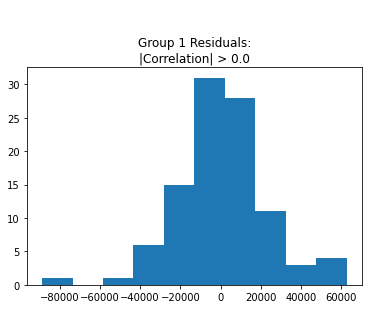

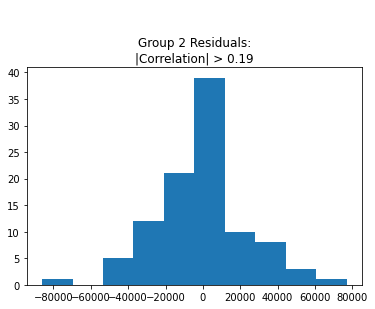

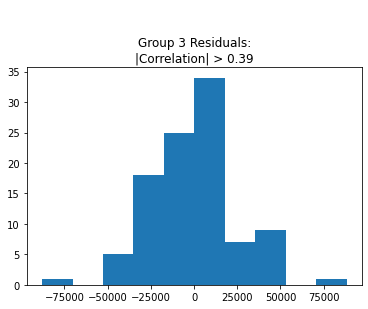

In [74]:
# Plot histogram of residuals


# Cycle through all models
count = 1
for max_not_include, predictions_train in zip(max_not_include_list, predictions_train_list):
    plt.hist(y - predictions_train)
    plt.title(f'\n\nGroup {count} Residuals:\n|Correlation| > {max_not_include}')
    plt.show()
    count += 1

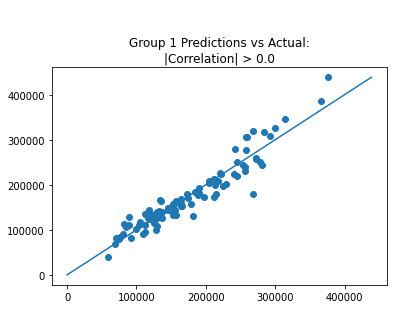

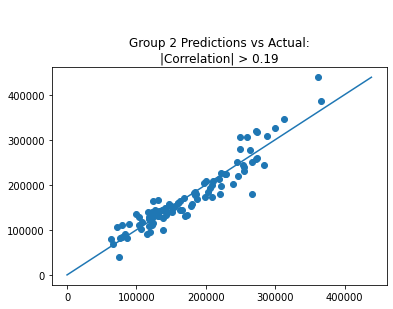

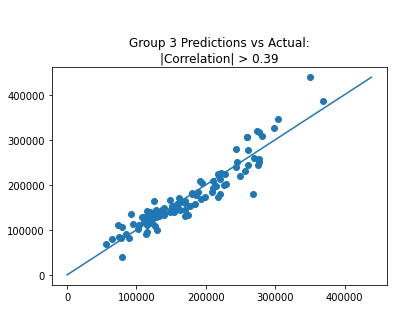

In [75]:
# Scatter plot of predictions

# Cycle through all models
count = 1
for max_not_include, predictions_train in zip(max_not_include_list, predictions_train_list): 
    plt.scatter(predictions_train, y)
    plt.plot( [0,y.max()],[0,y.max()] )
    plt.title(f'\n\nGroup {count} Predictions vs Actual:\n|Correlation| > {max_not_include}')
    plt.show() 
    count += 1

[Back to top](#Index)

### 3.3 Results

The group with the maximum number of columns, irrespective of the correlation values, produced the best results. The more restrictive the grouping was, in terms of the correlation coefficient, the lower it performed.

- The first group did not limit the number of variables by the correlation coefficient. It contained 91 variables and had a 90.38% accuracy. 

- The second group limited the number of variables to only those with a correlation coefficient greater than 0.19. The model contained 56 variables and had a 88.98% accuracy. 

- The last group limited the number of variables to only those with a correlation coefficient greater than 0.39. The model contained 29 variables and had a 88.24% accuracy.





In [76]:
# Determine accuracy of model compared

score_train_list = []

print(f'\nCoefficient of Determination (Train):\n')

# Cycle through all models
count = 1
for max_not_include, lim_corr_cols, model_train, x_train in zip(max_not_include_list, lim_corr_cols_list, model_train_list, x_train_list):
    score_train = model_train.score(x_train, y)
    print(f'\tGroup {count} R^2 |corr| > {max_not_include}: The sales price is being predicted with {score_train:.2%} accuracy by {len(lim_corr_cols)} columns.\n')
    score_train_list.append(score_train)
    count += 1


Coefficient of Determination (Train):

	Group 1 R^2 |corr| > 0.0: The sales price is being predicted with 90.38% accuracy by 34 columns.

	Group 2 R^2 |corr| > 0.19: The sales price is being predicted with 88.98% accuracy by 25 columns.

	Group 3 R^2 |corr| > 0.39: The sales price is being predicted with 88.24% accuracy by 15 columns.



[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

The model performed well against the testing data. In addition, similar performance was observed between the training and testing data. 

The performance on the testing data showed that more restrictive limitations placed on the correlation coefficient resulted in lower model scores. 

Based on this observation, the model appears to be a well-fitted linear regression model. 

In [77]:
# Determine accuracy compared to test data

print(f'\nCoefficient of Determination (Test):\n')

# Cycle through all models
count = 1
for max_not_include, lim_corr_cols, lr_test, score_train in zip(max_not_include_list, lim_corr_cols_list, lr_train_list, score_train_list):
    # Get x, y values from test data
    x_test = clean_test_data[lim_corr_cols]
    y_test = clean_test_data['SalePrice']


    # Build Linear Regression Model
    lr_test = linear_model.LinearRegression()
    model_test = lr_test.fit(x_test, y_test)
    predictions_test = model_test.predict(x_test)

    # Score model against test data
    score_test = model_test.score(x_test, y_test)

    # Determine difference between the scores of the test and training data
    score_diff = score_test - score_train
    score_sign = "decrease" if score_diff < 0 else "increase"
    print(f'\tGroup {count} R^2 |corr| > {max_not_include}: The sales price is being predicted with {score_test:.2%} by {len(lim_corr_cols)} columns.\n\n\t\tThis is a {np.abs(score_diff):.2%} {score_sign} from the training data.\n\n')
    count += 1


Coefficient of Determination (Test):

	Group 1 R^2 |corr| > 0.0: The sales price is being predicted with 93.52% by 34 columns.

		This is a 3.14% increase from the training data.


	Group 2 R^2 |corr| > 0.19: The sales price is being predicted with 91.80% by 25 columns.

		This is a 2.81% increase from the training data.


	Group 3 R^2 |corr| > 0.39: The sales price is being predicted with 85.05% by 15 columns.

		This is a 3.19% decrease from the training data.




[Back to top](#Index)

## Conclusion

It is clear from the results that creating reliable house pricing models is no longer only the domain of deep-pocketed Wall Street firms. Accurate pricing models can be created by using publicly available datasets and software tools. 


Limiting results by the correlation coefficient had an adverse effect on the model score. There are several reasons why adding more variables with no correlation increased the models' scores. For example, it could have been a stimulating relationship in which the explanatory variable influences the sales price, but only in the presence of another explanatory variable. Or the relationship could have been complex in which many explanatory variables contribute to the influence of the sales price.[2]


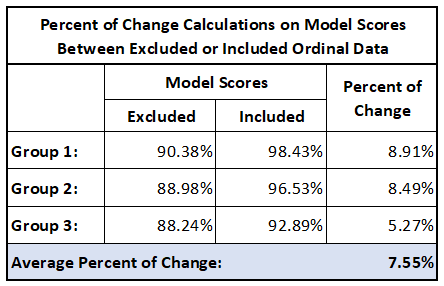


[Back to top](#Index
)
## References

1. Chen, B. "What is One-Hot Encoding and how to use Pandas get_dummies function." Toward Data Science. Medium, June 18, 2021. https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970

2. Kufs, C. (2014, November 2). Why you don't always get the correlation you expect. Stats With Cats Blog. Retrieved January 17, 2022, from https://statswithcats.net/2014/11/02/why-you-dont-always-get-the-correlation-you-expect/ 

3. LaMorte, W. W. (2021, April 21). PH717 module 9 - correlation and regression. The Correlation Coefficient (r). Retrieved January 16, 2022, from https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/PH717-Module9-Correlation-Regression4.html 

4. Linear Regression. Linear regression. (n.d.). Retrieved January 16, 2022, from http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm 

5. Swarmplot using Seaborn in python. GeeksforGeeks. (2020, November 6). Retrieved January 16, 2022, from https://www.geeksforgeeks.org/swarmplot-using-seaborn-in-python/ 

6. Union Grove. (n.d.). Least-squares regression . AP Statistics Notes. Retrieved January 17, 2022, from http://www.henry.k12.ga.us/ugh/apstat/chapternotes/sec3.3.html 